In [58]:
import pandas as pd
import numpy as np

In [59]:
df_train = pd.read_csv("https://factored-workshops.s3.amazonaws.com/taxi-trip-duration.csv")
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_borough,dropoff_borough
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98215,40.76794,-73.96463,40.76560,N,455,Manhattan,Manhattan
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98042,40.73856,-73.99948,40.73115,N,663,Manhattan,Brooklyn
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.97903,40.76394,-74.00533,40.71009,N,2124,Manhattan,Brooklyn
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01004,40.71997,-74.01227,40.70672,N,429,Brooklyn,Brooklyn
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97305,40.79321,-73.97292,40.78252,N,435,Manhattan,Manhattan


In [60]:
df_train = df_train.drop("dropoff_datetime", axis=1)

In [61]:
df_train.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
pickup_borough         object
dropoff_borough        object
dtype: object

In [62]:
df_train['pickup_datetime']= pd.to_datetime(df_train['pickup_datetime'])

In [63]:
df_train["year"] = df_train["pickup_datetime"].dt.year
df_train["month"] = df_train["pickup_datetime"].dt.month
df_train["weekday"] = df_train["pickup_datetime"].dt.weekday
df_train["hour"] = df_train["pickup_datetime"].dt.hour

df_train[["pickup_datetime","year","month","weekday","hour"]].head()

,pickup_datetime,year,month,weekday,hour
0,2016-03-14 17:24:55,2016,3,0,17
1,2016-06-12 00:43:35,2016,6,6,0
2,2016-01-19 11:35:24,2016,1,1,11
3,2016-04-06 19:32:31,2016,4,2,19
4,2016-03-26 13:30:55,2016,3,5,13


In [64]:
df_train.shape

(1458644, 16)

In [65]:
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
# Convertir a todos con # 5 decimales
df_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,year,month,weekday,hour
count,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000
mean,1.53495,1.66453,-73.97349,40.75092,-73.97342,40.75180,959.49227,2016.00000,3.51682,3.05037,13.60648
std,0.49878,1.31424,0.07090,0.03288,0.07064,0.03589,5237.43172,0.00000,1.68104,1.95404,6.39969
min,1.00000,0.00000,-121.93334,34.35970,-121.93330,32.18114,1.00000,2016.00000,1.00000,0.00000,0.00000
25%,1.00000,1.00000,-73.99187,40.73735,-73.99133,40.73588,397.00000,2016.00000,2.00000,1.00000,9.00000
50%,2.00000,1.00000,-73.98174,40.75410,-73.97975,40.75452,662.00000,2016.00000,4.00000,3.00000,14.00000
75%,2.00000,2.00000,-73.96733,40.76836,-73.96301,40.76981,1075.00000,2016.00000,5.00000,5.00000,19.00000
max,2.00000,9.00000,-61.33553,51.88108,-61.33553,43.92103,3526282.00000,2016.00000,6.00000,6.00000,23.00000


In [66]:
df_train.head(3)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_borough,dropoff_borough,year,month,weekday,hour
0,id2875421,2,2016-03-14 17:24:55,1,-73.98215,40.76794,-73.96463,40.76560,N,455,Manhattan,Manhattan,2016,3,0,17
1,id2377394,1,2016-06-12 00:43:35,1,-73.98042,40.73856,-73.99948,40.73115,N,663,Manhattan,Brooklyn,2016,6,6,0
2,id3858529,2,2016-01-19 11:35:24,1,-73.97903,40.76394,-74.00533,40.71009,N,2124,Manhattan,Brooklyn,2016,1,1,11


In [67]:
df_train[['id','trip_duration']].sort_values('trip_duration',ascending=False).head(n=10)

,id,trip_duration
978383,id0053347,3526282
924150,id1325766,2227612
680594,id0369307,2049578
355003,id1864733,1939736
1234291,id1942836,86392
295382,id0593332,86391
73816,id0953667,86390
59891,id2837671,86387
1360439,id1358458,86385
753765,id2589925,86379


In [68]:
df_train[df_train['trip_duration'] > 100000]

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_borough,dropoff_borough,year,month,weekday,hour
355003,id1864733,1,2016-01-05 00:19:42,1,-73.78965,40.64356,-73.95681,40.77309,N,1939736,Staten_island,Manhattan,2016,1,1,0
680594,id0369307,1,2016-02-13 22:38:00,2,-73.92168,40.73525,-73.98475,40.75998,N,2049578,Brooklyn,Manhattan,2016,2,5,22
924150,id1325766,1,2016-01-05 06:14:15,1,-73.98379,40.74232,-73.98549,40.72768,N,2227612,Manhattan,Brooklyn,2016,1,1,6
978383,id0053347,1,2016-02-13 22:46:52,1,-73.78391,40.64863,-73.97827,40.75020,N,3526282,Queens,Manhattan,2016,2,5,22


In [69]:
df_train = df_train[df_train['trip_duration'] < 100000]

In [70]:
df_train.shape
# 1 458 640 datos
# 16 columnas

(1458640, 16)

# Análisis de variables

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

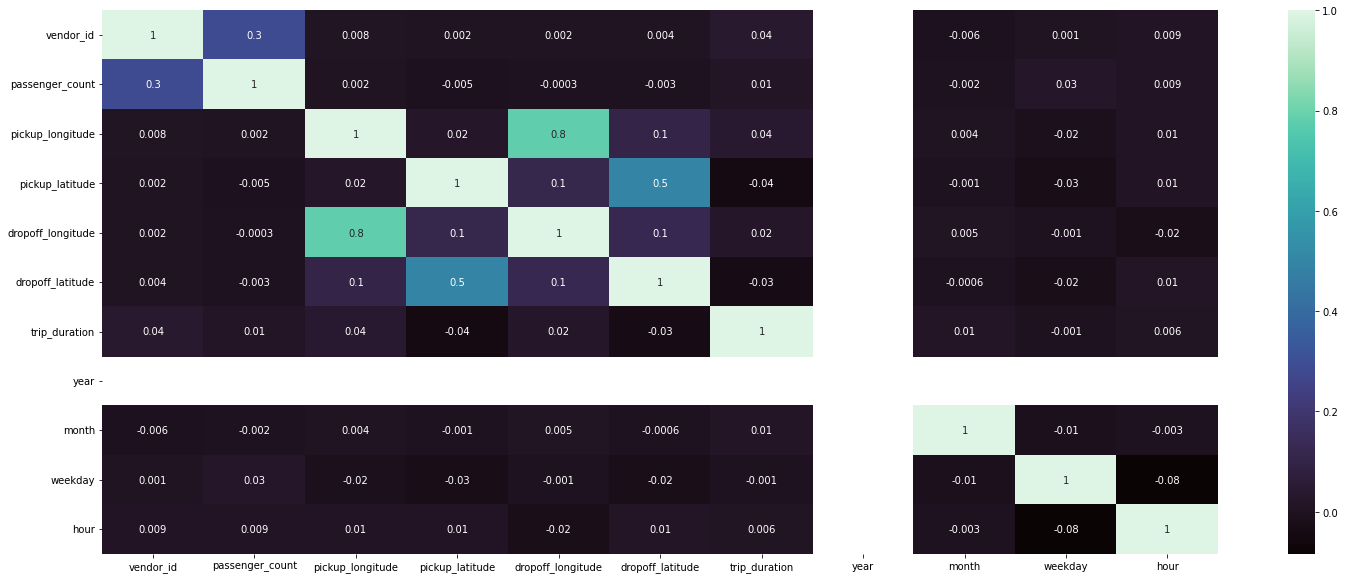

In [72]:
plt.subplots(figsize=(25,10))
sns.heatmap(df_train.corr(), annot = True, fmt='.1g', cmap="mako");

In [ ]:
# Pearson <> Evalua una correlacion lineal
# Spearman <> Busca una relacion monotomica

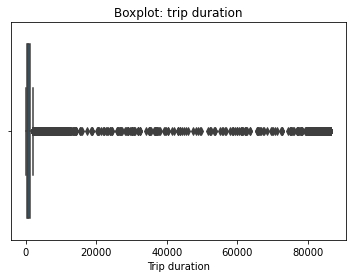

In [73]:
fig, ax = plt.subplots()
sns.boxplot(data = df_train
             , x = "trip_duration"
             , ax = ax)
ax.set_title("Boxplot: trip duration")
ax.set_xlabel("Trip duration")

plt.show()

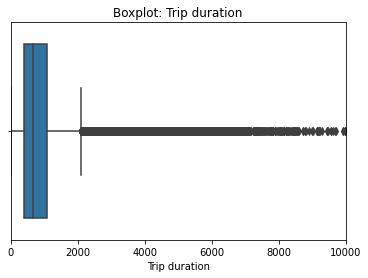

In [74]:
fig, ax = plt.subplots()
sns.boxplot(data = df_train
            , x = "trip_duration"
            , ax = ax)
ax.set_xlim(0,10000)
ax.set_title("Boxplot: Trip duration")
ax.set_xlabel("Trip duration")
plt.show()

In [79]:
import matplotlib.style 
import matplotlib as mpl 
mpl.style.use('classic')

In [82]:
fig = px.box(df_train
             , y = "trip_duration"
             , labels = {"trip_duration": "Trip duration"}
             , title = "Boxplot: Trip duration")
fig.update_yaxes(range=[0, 10000])
fig.show()

Output hidden; open in https://colab.research.google.com to view.

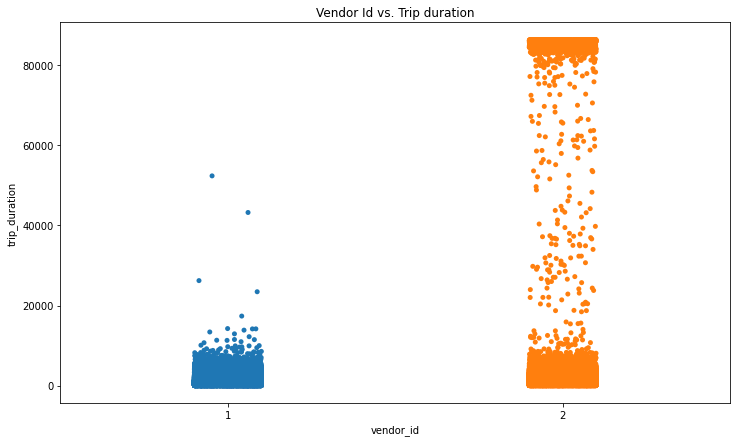

In [76]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.stripplot(data = df_train
              , x = "vendor_id"
              , y = "trip_duration"
              , ax = ax)
ax.set_title("Vendor Id vs. Trip duration");

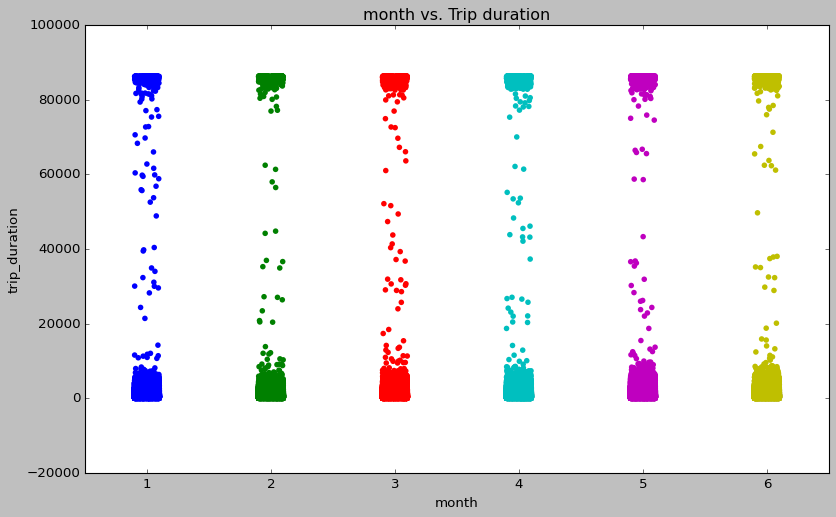

In [83]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.stripplot(data = df_train
              , x = "month"
              , y = "trip_duration"
              , ax = ax)
ax.set_title("month vs. Trip duration");

# **Month**

In [84]:
df_train[['month', 'trip_duration']].groupby(by=['month']).agg({'trip_duration':['mean', 'count']})

trip_duration        
               mean   count
month                      
1         904.23918  229705
2         897.43950  238298
3         937.36536  256189
4         962.89146  251645
5         999.45055  248487
6        1013.36723  234316

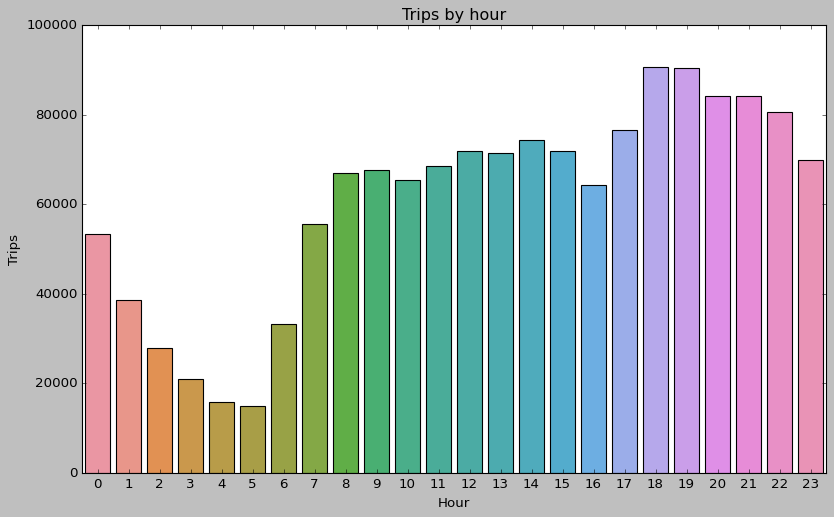

In [85]:
hour_trip = df_train[['hour', 'trip_duration']].groupby(by=['hour']).agg({'trip_duration': 'count'}).reset_index()

fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(data = hour_trip
              , x = "hour"
              , y = "trip_duration"
              , ax = ax)
ax.set_title("Trips by hour")
ax.set_xlabel("Hour")
ax.set_ylabel("Trips");

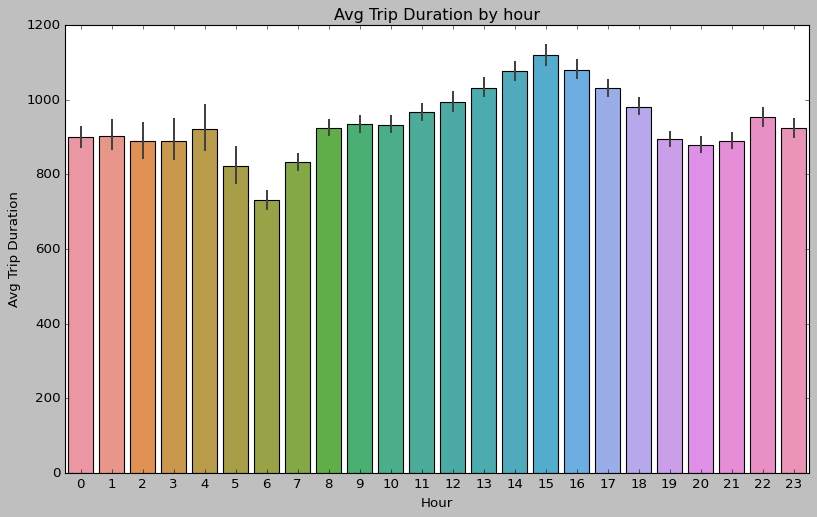

In [86]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(data = df_train
              , x = "hour"
              , y = "trip_duration"
              , ax = ax)
ax.set_title("Avg Trip Duration by hour")
ax.set_xlabel("Hour")
ax.set_ylabel("Avg Trip Duration");

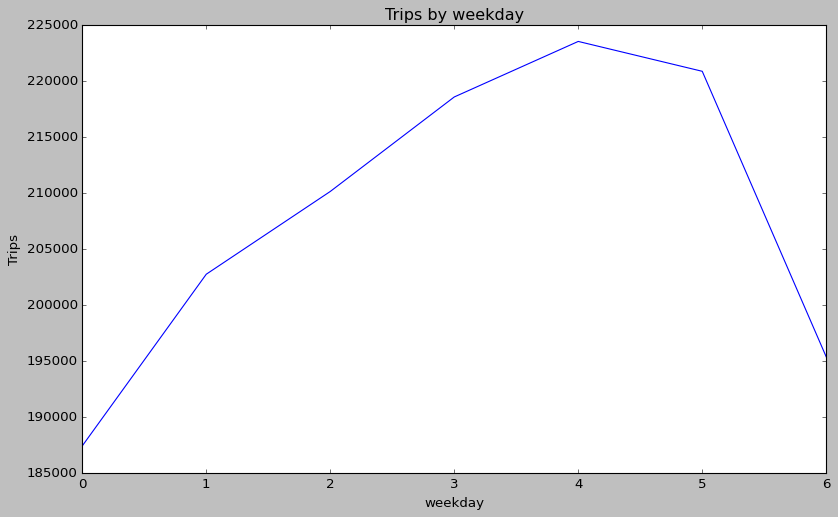

In [87]:
weekday_trip = df_train[['weekday', 'trip_duration']].groupby(by=['weekday']).agg({'trip_duration': 'count'}).reset_index()

fig, ax = plt.subplots(figsize=(12, 7))
sns.lineplot(data = weekday_trip
              , x = "weekday"
              , y = "trip_duration"
              , ax = ax
              , markers = True
                )
ax.set_title("Trips by weekday")
ax.set_xlabel("weekday")
ax.set_ylabel("Trips");

In [88]:
weekday_trip

,weekday,trip_duration
0,0,187418
1,1,202747
2,2,210136
3,3,218574
4,4,223533
5,5,220866
6,6,195366


In [90]:
weekday_trip = df_train[['weekday', 'trip_duration']].groupby(by=['weekday']).agg({'trip_duration': 'count'}).reset_index()


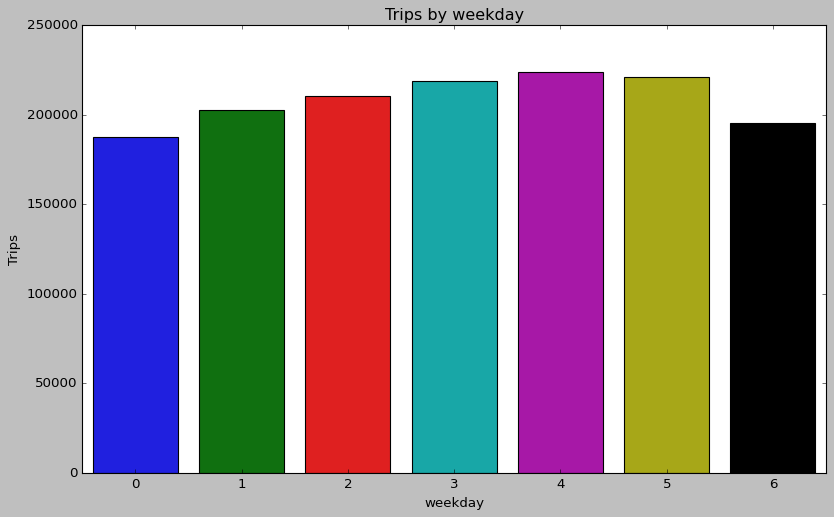

In [92]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(data = weekday_trip
              , x = "weekday"
              , y = "trip_duration"
              , ax = ax)
ax.set_title("Trips by weekday")
ax.set_xlabel("weekday")
ax.set_ylabel("Trips");

# **Passengers**

In [99]:
passengers_trip = df_train[['passenger_count',
                            'trip_duration']].groupby(
                                by=['passenger_count']).agg(
                                    {'trip_duration':['count','min','max',np.mean]})#.reset_index()
passengers_trip

trip_duration                       
                        count  min    max       mean
passenger_count                                     
0                          60    1  85901 1718.43333
1                     1033537    1  86391  922.95847
2                      210317    1  86392  995.71793
3                       59896    2  86365 1028.23628
4                       28404    2  86379 1053.52975
5                       78088    2  86378 1070.23217
6                       48333    2  86377 1061.35522
7                           3   15     25   19.66667
8                           1  104    104  104.00000
9                           1  560    560  560.00000

In [96]:
pivot_table = pd.pivot_table(df_train, 
                             values='trip_duration', 
                             index=['pickup_borough'],
                    columns=['dropoff_borough'], aggfunc=np.mean)
pivot_table

dropoff_borough,Bronx,Brooklyn,Manhattan,Queens,Staten_island
pickup_borough,,,,,
Bronx,793.20118,2257.80000,1491.17901,1349.42857,3628.40000
Brooklyn,2554.01218,762.58988,1104.32059,2103.19124,3033.34688
Manhattan,1676.25281,1173.13474,750.06705,1899.63377,2954.35378
Queens,1692.97097,2126.34177,2065.53434,908.81212,1604.67465
Staten_island,2531.93363,2650.97031,3043.28411,1526.62546,813.44935


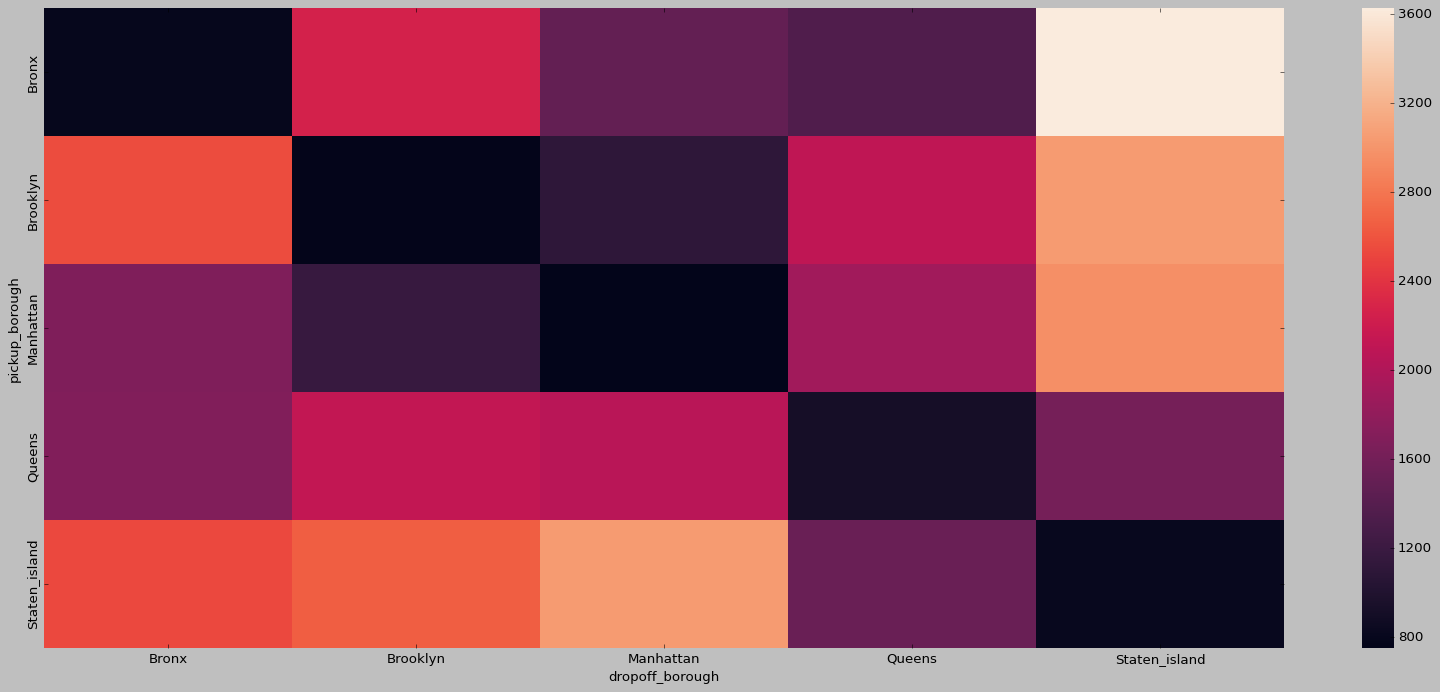

In [97]:
plt.subplots(figsize=(25, 10))
sns.heatmap(pivot_table);